<a href="https://colab.research.google.com/github/maryamq/MLToys/blob/main/MonteCarlo_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [9]:
norm_layer = tf.keras.layers.Normalization(axis=None)
norm_layer.adapt(x_train)

In [11]:
drop_out = 0.1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(13,)))
model.add(norm_layer)
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1))

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.008))
model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
12/12 [==============================] - 1s 16ms/step - loss: 473.4565 - val_loss: 184.1750
Epoch 2/30
12/12 [==============================] - 0s 5ms/step - loss: 170.2584 - val_loss: 83.7946
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 118.8976 - val_loss: 48.6678
Epoch 4/30
12/12 [==============================] - 0s 4ms/step - loss: 102.3244 - val_loss: 30.7931
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 96.2687 - val_loss: 23.3846
Epoch 6/30
12/12 [==============================] - 0s 5ms/step - loss: 85.0788 - val_loss: 21.9601
Epoch 7/30
12/12 [==============================] - 0s 4ms/step - loss: 88.3418 - val_loss: 21.6962
Epoch 8/30
12/12 [==============================] - 0s 5ms/step - loss: 79.9600 - val_loss: 25.5225
Epoch 9/30
12/12 [==============================] - 0s 4ms/step - loss: 87.7378 - val_loss: 21.9494
Epoch 10/30
12/12 [==============================] - 0s 5ms/step - loss: 80.9039 - val_loss: 2

In [36]:
def get_preds(model, x_test, num_samples=1, enable_mc=False):
  preds = [model(x_test, training=enable_mc) for _ in range(num_samples)]
  return np.stack(preds)

def get_preds_mean(model, x_test, num_samples=1, enable_mc=False):
  preds = get_preds(model, x_test, num_samples, enable_mc)
  return preds.mean(axis=0)

In [37]:
from sklearn.metrics import mean_squared_error
print("Simple Model: ",mean_squared_error(get_preds_mean(model, x_test), y_test) )
print("MC Model: ",mean_squared_error(get_preds_mean(model, x_test, num_samples=100, enable_mc=True), y_test))

Simple Model:  57.0677925997827
MC Model:  56.41456241766134


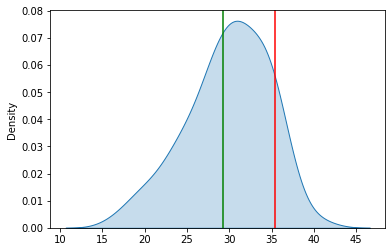

In [47]:
sample_idx = 50
sample_preds = get_preds(model, x_test[sample_idx], num_samples=100, enable_mc=True)
simple_pred = get_preds_mean(model, x_test[sample_idx], num_samples=1, enable_mc=False)
sns.kdeplot(sample_preds.reshape(-1), shade=True)
plt.axvline(simple_pred, color='green')
plt.axvline(y_test[sample_idx], color='red')